# ANALYSIS OF USA CANCER DATA 

### PRESENTED BY MOJEED AJEGBILE 

## INTRODUCTION

##### MOTIVATION
We are aware that cancer is one of the leading cause of death across the nation and the government and other intervention agencies are spending billions of dollars on prophylactic and therapeutic control of the disease. We also know that cancer impacts people of all ages, races, ethnicities, and sexes, but it does not always affect them equally. Differences in genetics, hormones, environmental exposures, and other factors can lead to differences in risk among different groups of people.


##### DATA SOURCE
The data includes cancer registry data from CDC and the National Cancer Institute (NCI), as well as mortality data from CDC’s National Center for Health Statistics. The data provide information on newly diagnosed cancer cases and cancer deaths for the whole U.S. population from 1999 to 2014. 



In [65]:
import pandas as pd
import os
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import numpy as np
from operator import itemgetter
from IPython.core.display import display,HTML

##### STRUCTURE OF THE DATA
The data has 14 columns and 961776 rows. Missing values are represented with "~". We did not remove the missing values, whenever an arithmetic operarion has to be performed we "coerce" the symbol to allow the operation. 

## WHAT WE WANT TO SEE FROM THE DATA
* Cancer Distribution
* Trends
* Simple predictive model



In [4]:
path=os.path.join('project','BYAREA.txt')
dt=pd.read_csv(path,sep='|')
print(dt.info())
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961776 entries, 0 to 961775
Data columns (total 14 columns):
AREA                     961776 non-null object
AGE_ADJUSTED_CI_LOWER    961776 non-null object
AGE_ADJUSTED_CI_UPPER    961776 non-null object
AGE_ADJUSTED_RATE        961776 non-null object
COUNT                    961776 non-null object
EVENT_TYPE               961776 non-null object
POPULATION               961776 non-null int64
RACE                     961776 non-null object
SEX                      961776 non-null object
SITE                     961776 non-null object
YEAR                     961776 non-null object
CRUDE_CI_LOWER           961776 non-null object
CRUDE_CI_UPPER           961776 non-null object
CRUDE_RATE               961776 non-null object
dtypes: int64(1), object(13)
memory usage: 102.7+ MB
None


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.1,9299,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,361.8,376.8,369.2,9467,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,402.9,419.5,411.1
3,Alabama,160.8,170.6,165.7,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.6,392.8,385.1,9969,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.2,440.2,431.7


# ANALYSIS

### What are the most common types of cancer in the USA
##### METHOD
We get a subset of our data that that are not all cancer type and that are not regional data. We also remove data that are grouped from 2010-2014. We looped through the data to get the count for each of the cancer type and store the cancer and its count as a value-pair in a dictionary. The dictionary is sorted and plotted. 

Text(0.5,0,'Cancer Types')

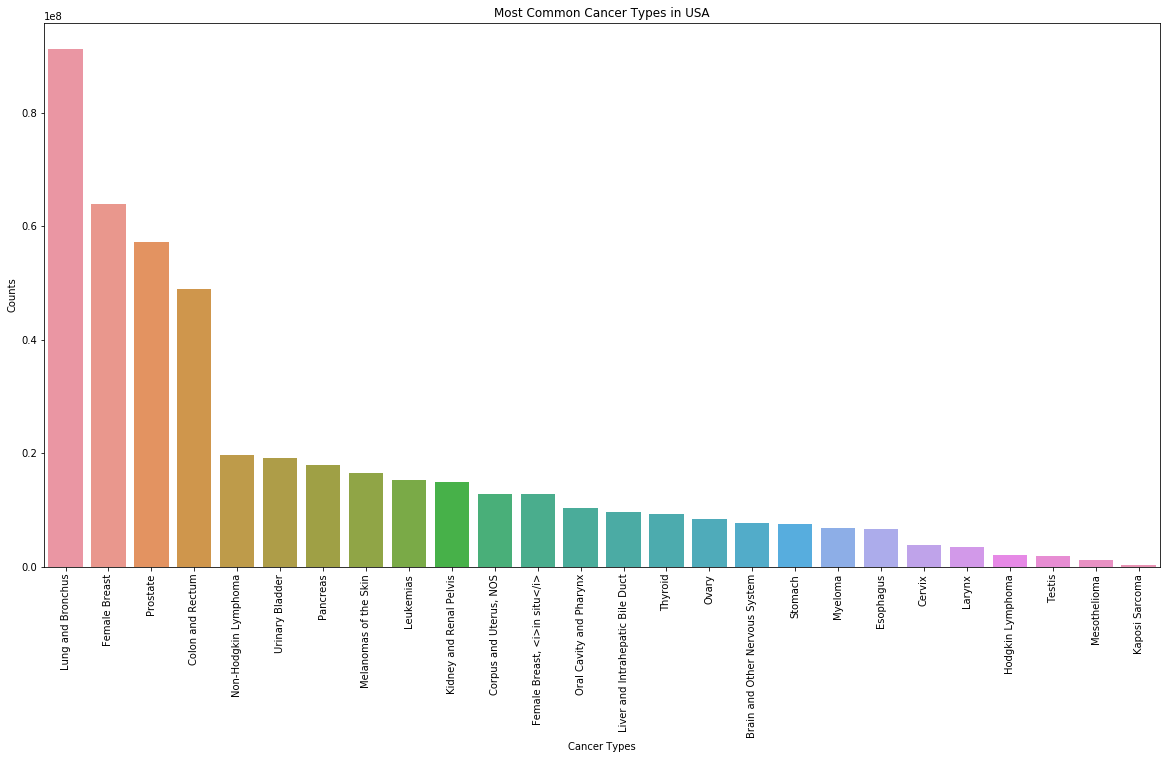

In [72]:
#### Most popular cancer types in usa
r1=['East North Central','East South Central','Middle Atlantic','Midwest','Mountain','Northeast','South','South Atlantic','Pacific',
'West','West North Central','West South Central','United States (comparable to ICD-O-2)','San Francisco-Oakland',
 'San Jose-Monterey','Seattle-Puget Sound','New England','Detroit','Atlanta']
counts={}
data=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),"SITE"]
ctype=set(data)
for cancer in ctype:
    ct_cancer=dt.loc[dt.SITE==cancer,"COUNT"]
    ct=pd.to_numeric(ct_cancer,errors='coerce').sum()
    counts[cancer]=ct
ranked=sorted(counts.items(),key=itemgetter(1),reverse=True)
#kys=[k for k in counts]
#val=[v for k,v in counts.items()]
ctyp=[ranked[i][0] for i in range(len(ranked))]
cts=[ranked[i][1] for i in range(len(ranked))]
plt.figure(figsize=(20,10))
#plt.bar(ctyp,cts)
ax=sns.barplot(ctyp,cts)
ax.set_xticklabels(ctyp, rotation=90)
ax.set_title('Most Common Cancer Types in USA')
ax.set_ylabel('Counts')
ax.set_xlabel('Cancer Types')
#counts
#cts
#ctyp

# What Cancer types are the most deadly across all race and gender

We counted all the mortality associated with each cancer type.
We avoided repetitive counting by leaving out all cancer site and regional mortality since these are already included in the state's counts. Cancer types and their associated mortality count are stored in a dictionary which was sorted and plotted.

Text(0.5,0,'Cancer Types')

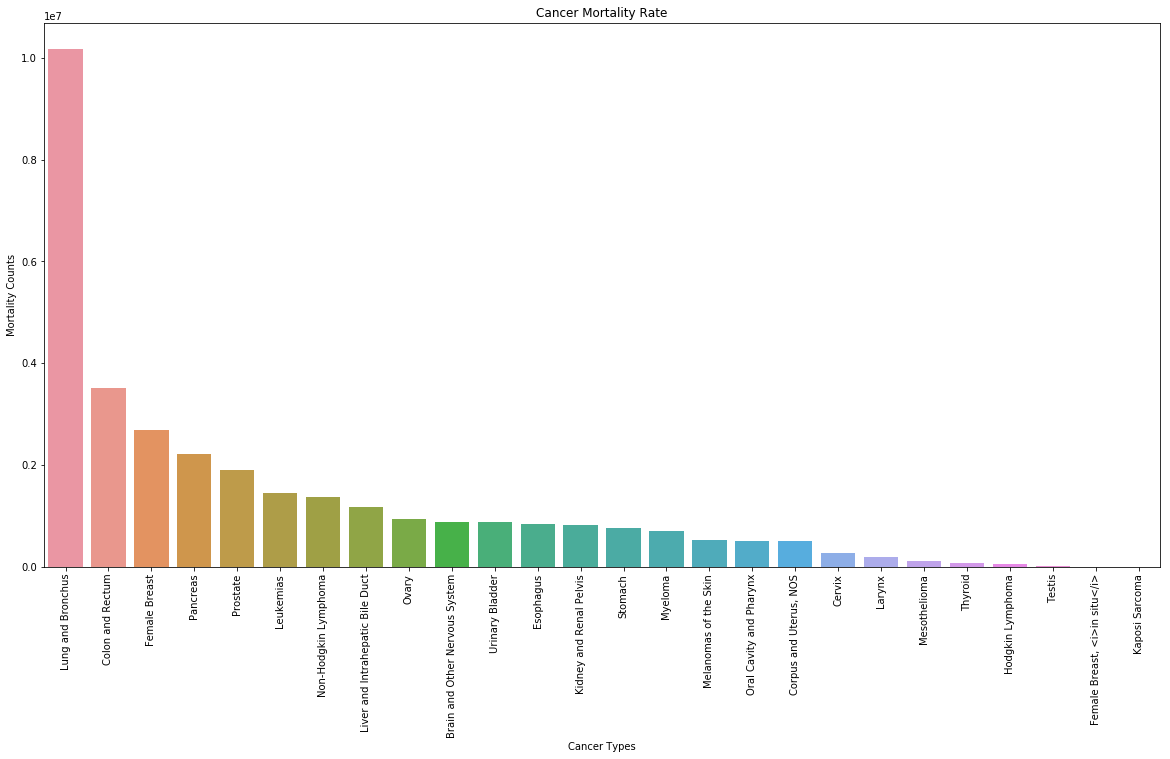

In [73]:
#####Cancers that causes highest number of death in USA
countsm={}
da=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(dt.EVENT_TYPE=="Mortality")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["COUNT","SITE"]]
for cancer in ctype:
    mct_cancer=da.loc[da.SITE==cancer,"COUNT"]
    mct=pd.to_numeric(mct_cancer,errors='coerce').sum()
    countsm[cancer]=mct
countsm    
ranked=sorted(countsm.items(),key=itemgetter(1),reverse=True)
cty=[ranked[i][0] for i in range(len(ranked))]
ct=[ranked[i][1] for i in range(len(ranked))]
#plt.bar(cty,ct)
#ranked
plt.figure(figsize=(20,10))
#plt.bar(ctyp,cts)
ax=sns.barplot(cty,ct)
ax.set_xticklabels(cty, rotation=90)
ax.set_title('Cancer Mortality Rate')
ax.set_ylabel('Mortality Counts')
ax.set_xlabel('Cancer Types')

# CANCER DISTRIBUTION ACROSS RACES

## MOST COMMON CANCER TYPES BY RACE

We obtained a subset of our data for each race and we counted all the cancer associated with that race. We rated the count and the top 5 cancer occuring in each race is plotted.

Text(0,0.5,'Counts')

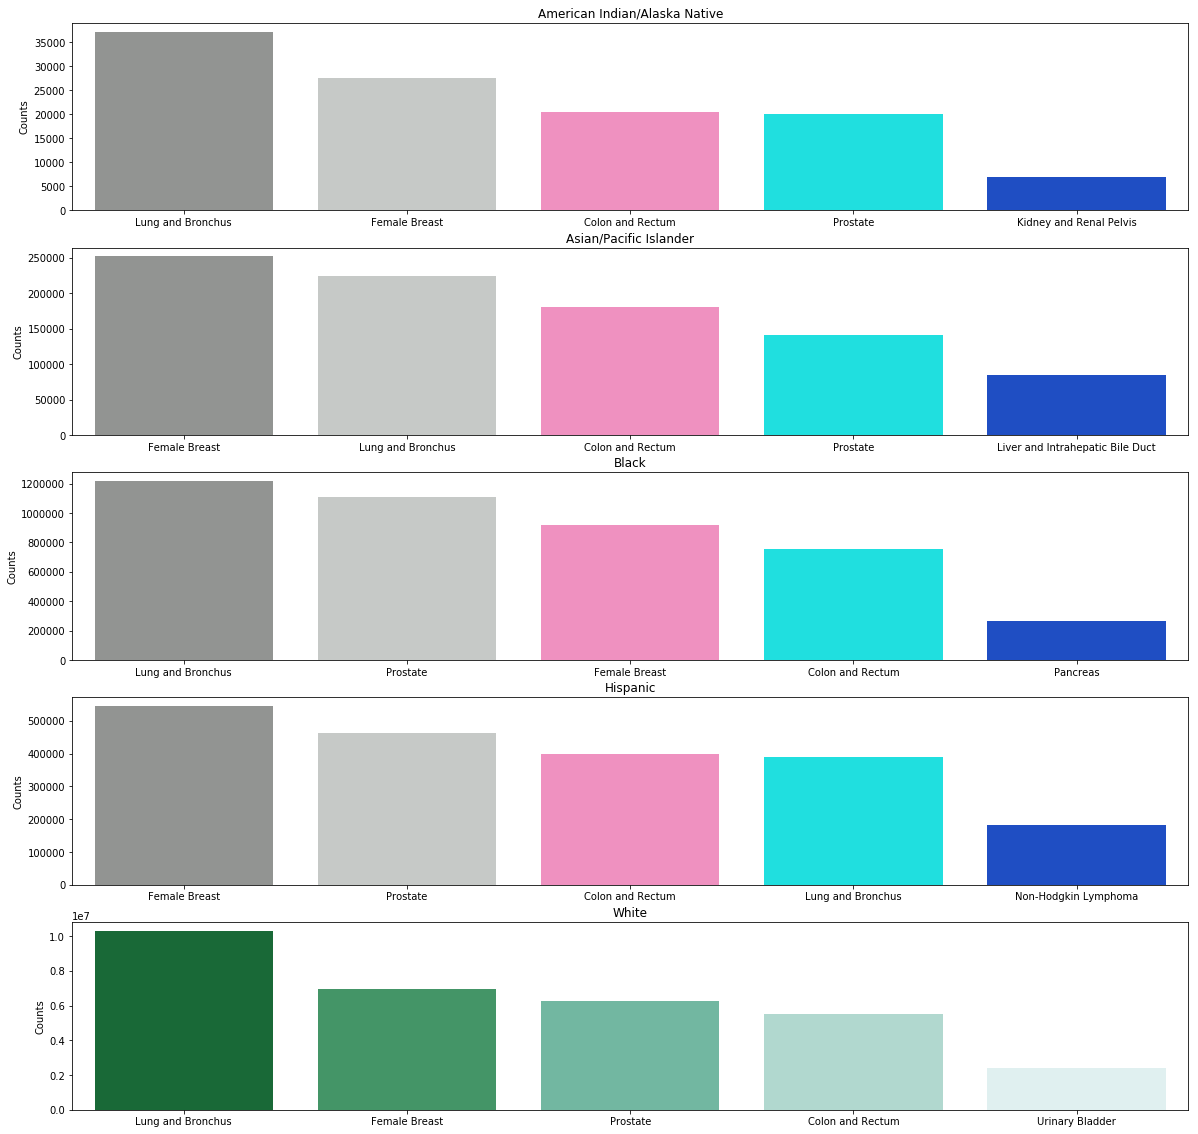

In [76]:
races=set(dt.RACE)
uniqCancer=set(dt.SITE)
ls={}
for race in races:
    lds={}
    if race !="All Races":
        data1=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(dt.RACE==race)&(dt.RACE!="All Races")&(dt.YEAR!='2010-2014')&(~dt.AREA.isin(r1)),["SITE","COUNT"]]  
        for cancer in uniqCancer:
            nw=data1.loc[data1.SITE==cancer,"COUNT"]
            mct=pd.to_numeric(nw,errors='coerce').sum()
            lds[cancer]=mct   
    ls[race]=lds  
American_Indian_Alaska_Native=sorted(ls["American Indian/Alaska Native"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAI=[American_Indian_Alaska_Native[i][0] for i in range(len(American_Indian_Alaska_Native))]
ctAI=[American_Indian_Alaska_Native[i][1] for i in range(len(American_Indian_Alaska_Native))]
Asian_Pacific_Islander=sorted(ls["Asian/Pacific Islander"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAP=[Asian_Pacific_Islander[i][0] for i in range(len(Asian_Pacific_Islander))]
ctAP=[Asian_Pacific_Islander[i][1] for i in range(len(Asian_Pacific_Islander))]
Black=sorted(ls["Black"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyB=[Black[i][0] for i in range(len(Black))]
ctB=[Black[i][1] for i in range(len(Black))]
Hispanic=sorted(ls["Hispanic"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyH=[Hispanic[i][0] for i in range(len(Hispanic))]
ctH=[Hispanic[i][1] for i in range(len(Hispanic))]
White=sorted(ls["White"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyW=[White[i][0] for i in range(len(White))]
ctW=[White[i][1] for i in range(len(White))]
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20, 20))
sns.barplot(ctyAI,ctAI, palette=sns.xkcd_palette(['grey', 'silver', 'pink','cyan','blue']), ax=ax1)
#ax1.set_xticklabels(ctyAI, rotation=30)
ax1.set_title("American Indian/Alaska Native")
ax1.set_ylabel('Counts')
sns.barplot(ctyAP,ctAP, palette=sns.xkcd_palette(['grey', 'silver', 'pink','cyan','blue']), ax=ax2)
#ax2.set_xticklabels(ctyAP, rotation=30)
ax2.set_title("Asian/Pacific Islander")
ax2.set_ylabel('Counts')
sns.barplot(ctyB,ctB, palette=sns.xkcd_palette(['grey', 'silver', 'pink','cyan','blue']), ax=ax3)
#ax3.set_xticklabels(ctyB, rotation=30)
ax3.set_title("Black")
ax3.set_ylabel('Counts')
sns.barplot(ctyH,ctH, palette=sns.xkcd_palette(['grey', 'silver', 'pink','cyan','blue']), ax=ax4)
#ax4.set_xticklabels(ctyH, rotation=30)
ax4.set_title("Hispanic")
ax4.set_ylabel('Counts')
sns.barplot(ctyW,ctW, palette="BuGn_r", ax=ax5)
#ax5.set_xticklabels(ctyW, rotation=30)
ax5.set_title("White")
ax5.set_ylabel('Counts')

#American_Indian_Alaska_Native
#Black

## We are not satisfied with the distribution above because Breast cancer and Prostate cancer are gender specific, so we have to break down the distribution by sex

#### Cancer Distrbution Across Races (Male)

More data filtering has to be done. This time around we have RACE, CANCER, SEX(specified as Male) and COUNT of each cancer as our filtering criteria.

Text(0.5,1,'White')

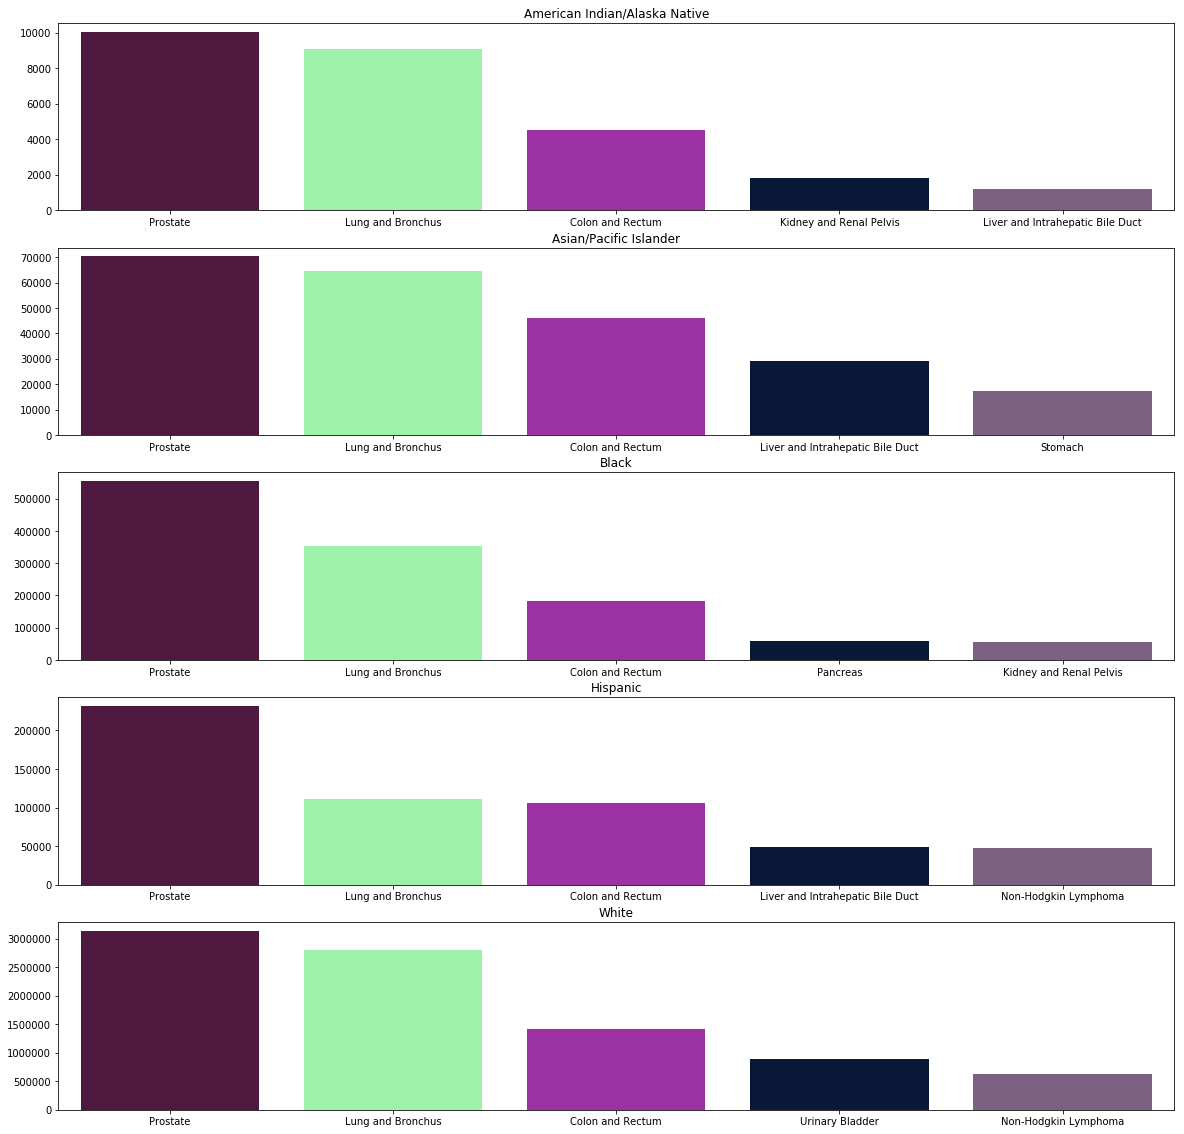

In [60]:
races=set(dt.RACE)
uniqCancer=set(dt.SITE)
ls={}
for race in races:
    lds={}
    if race !="All Races":
        data1=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(dt.SEX=="Male")&(dt.RACE==race)&(dt.RACE!="All Races")&(dt.YEAR!='2010-2014')&(~dt.AREA.isin(r1)),["SITE","COUNT"]]  
        for cancer in uniqCancer:
            nw=data1.loc[data1.SITE==cancer,"COUNT"]
            mct=pd.to_numeric(nw,errors='coerce').sum()
            lds[cancer]=mct   
    ls[race]=lds  
American_Indian_Alaska_Native=sorted(ls["American Indian/Alaska Native"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAI=[American_Indian_Alaska_Native[i][0] for i in range(len(American_Indian_Alaska_Native))]
ctAI=[American_Indian_Alaska_Native[i][1] for i in range(len(American_Indian_Alaska_Native))]
Asian_Pacific_Islander=sorted(ls["Asian/Pacific Islander"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAP=[Asian_Pacific_Islander[i][0] for i in range(len(Asian_Pacific_Islander))]
ctAP=[Asian_Pacific_Islander[i][1] for i in range(len(Asian_Pacific_Islander))]
Black=sorted(ls["Black"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyB=[Black[i][0] for i in range(len(Black))]
ctB=[Black[i][1] for i in range(len(Black))]
Hispanic=sorted(ls["Hispanic"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyH=[Hispanic[i][0] for i in range(len(Hispanic))]
ctH=[Hispanic[i][1] for i in range(len(Hispanic))]
White=sorted(ls["White"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyW=[White[i][0] for i in range(len(White))]
ctW=[White[i][1] for i in range(len(White))]
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20, 20))
sns.barplot(ctyAI,ctAI, palette=sns.xkcd_palette(['plum', 'mint green', 'barney','navy','muted purple']), ax=ax1)
#ax1.set_xticklabels(ctyAI, rotation=30)
ax1.set_title("American Indian/Alaska Native")
sns.barplot(ctyAP,ctAP, palette=sns.xkcd_palette(['plum', 'mint green', 'barney','navy','muted purple']), ax=ax2)
#ax2.set_xticklabels(ctyAP, rotation=30)
ax2.set_title("Asian/Pacific Islander")
sns.barplot(ctyB,ctB, palette=sns.xkcd_palette(['plum', 'mint green', 'barney','navy','muted purple']), ax=ax3)
#ax3.set_xticklabels(ctyB, rotation=30)
ax3.set_title("Black")
sns.barplot(ctyH,ctH, palette=sns.xkcd_palette(['plum', 'mint green', 'barney','navy','muted purple']), ax=ax4)
#ax4.set_xticklabels(ctyH, rotation=30)
ax4.set_title("Hispanic")
sns.barplot(ctyW,ctW, palette=sns.xkcd_palette(['plum', 'mint green', 'barney','navy','muted purple']), ax=ax5)
#ax5.set_xticklabels(ctyW, rotation=30)
ax5.set_title("White")

#### Cancer Distrbution Across Races (Female)

This time around we have RACE, CANCER, SEX(specified as female) and COUNT of each cancer as our filtering criteria. In each race, the we counted all cancer types that affect women and obtained the top 5.

Text(0.5,1,'White')

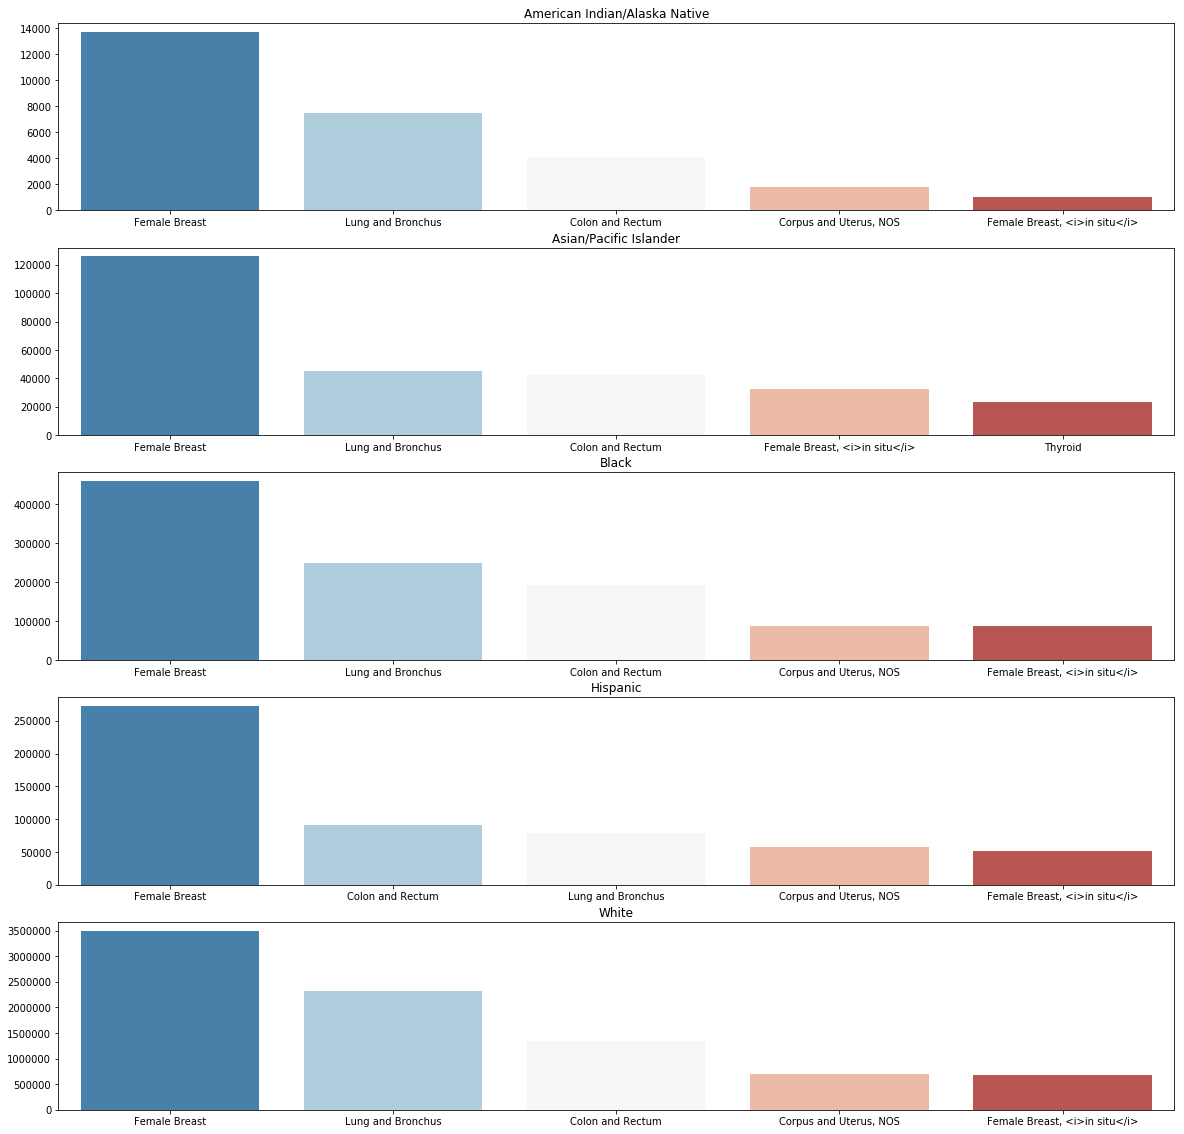

In [61]:
races=set(dt.RACE)
uniqCancer=set(dt.SITE)
ls={}
for race in races:
    lds={}
    if race !="All Races":
        data1=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(dt.SEX=="Female")&(dt.RACE==race)&(dt.RACE!="All Races")&(dt.YEAR!='2010-2014')&(~dt.AREA.isin(r1)),["SITE","COUNT"]]  
        for cancer in uniqCancer:
            nw=data1.loc[data1.SITE==cancer,"COUNT"]
            mct=pd.to_numeric(nw,errors='coerce').sum()
            lds[cancer]=mct   
    ls[race]=lds  
American_Indian_Alaska_Native=sorted(ls["American Indian/Alaska Native"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAI=[American_Indian_Alaska_Native[i][0] for i in range(len(American_Indian_Alaska_Native))]
ctAI=[American_Indian_Alaska_Native[i][1] for i in range(len(American_Indian_Alaska_Native))]
Asian_Pacific_Islander=sorted(ls["Asian/Pacific Islander"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyAP=[Asian_Pacific_Islander[i][0] for i in range(len(Asian_Pacific_Islander))]
ctAP=[Asian_Pacific_Islander[i][1] for i in range(len(Asian_Pacific_Islander))]
Black=sorted(ls["Black"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyB=[Black[i][0] for i in range(len(Black))]
ctB=[Black[i][1] for i in range(len(Black))]
Hispanic=sorted(ls["Hispanic"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyH=[Hispanic[i][0] for i in range(len(Hispanic))]
ctH=[Hispanic[i][1] for i in range(len(Hispanic))]
White=sorted(ls["White"].items(),key=itemgetter(1),reverse=True)[0:5]
ctyW=[White[i][0] for i in range(len(White))]
ctW=[White[i][1] for i in range(len(White))]
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(20, 20))
sns.barplot(ctyAI,ctAI, palette="RdBu_r", ax=ax1)
#ax1.set_xticklabels(ctyAI, rotation=30)
ax1.set_title("American Indian/Alaska Native")
sns.barplot(ctyAP,ctAP, palette="RdBu_r", ax=ax2)
#ax2.set_xticklabels(ctyAP, rotation=30)
ax2.set_title("Asian/Pacific Islander")
sns.barplot(ctyB,ctB, palette="RdBu_r", ax=ax3)
#ax3.set_xticklabels(ctyB, rotation=30)
ax3.set_title("Black")
sns.barplot(ctyH,ctH, palette="RdBu_r", ax=ax4)
#ax4.set_xticklabels(ctyH, rotation=30)
ax4.set_title("Hispanic")
sns.barplot(ctyW,ctW, palette="RdBu_r", ax=ax5)
#ax5.set_xticklabels(ctyW, rotation=30)
ax5.set_title("White")

# Which state has the highest cancer patients?
### This might be correlated with population per state.

We filtered all the cancer sites associated to a particular state summed all the counts for that state. A barplot is used to represent the count per each state.


Text(0.5,0,'Cancer Types')

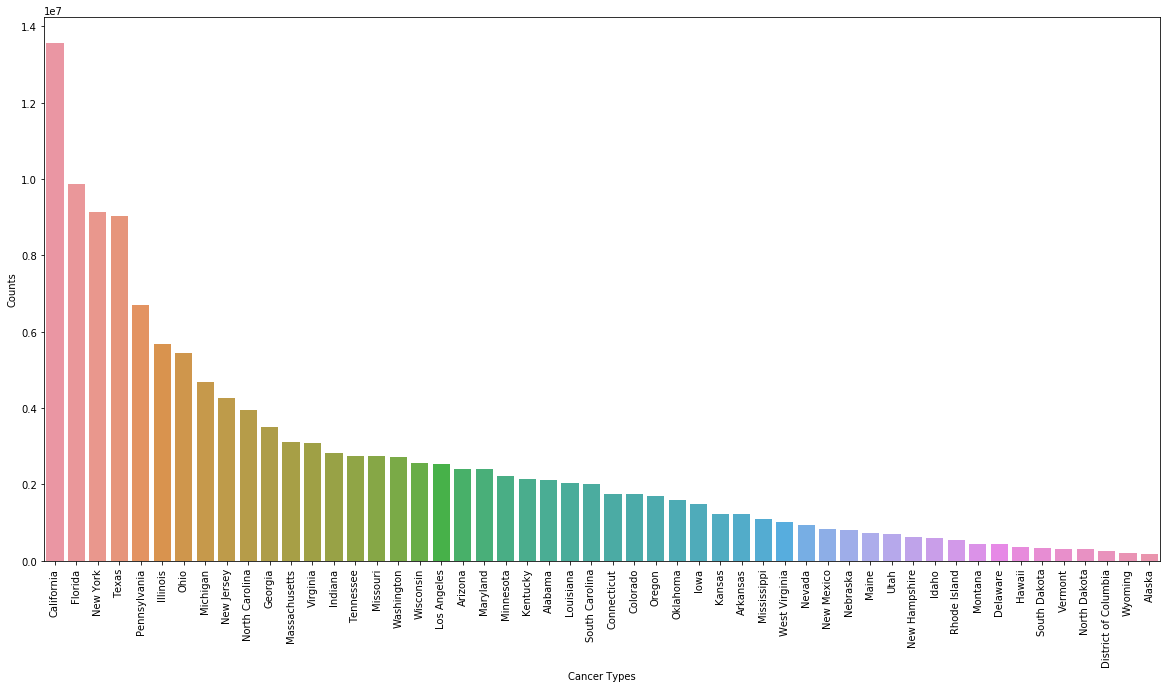

In [77]:
#####Distribution of cancer by state
#####(1) Wanna know the state that has the highest occurence of cancer
#####(2) Wanna know the distribution of cancer in each state ie 
### How get the count of all cancer type per state 
##### loc the data frame by 'all cancer type in SITE', get columns "COUNT" and "STATE"
##### for each state loc the new data frame where STATE is the state


### 
### loc the data frame by not equal'all cancer type in SITE', get columns SITE,"COUNT" and "STATE"
### For each state loc the df using state get SITE and COUNT
### for each UNIQUE SITE get the COUNT
area={}
states=set(dt.AREA)
da=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["AREA","COUNT"]]
for state in states:
    if state in r1:
        continue
    dat1=da.loc[da.AREA==state,"COUNT"]
    cnt=pd.to_numeric(dat1,errors='coerce').sum()
    area[state]=cnt
ranked=sorted(area.items(),key=itemgetter(1),reverse=True)
ctyAr=[ranked[i][0] for i in range(len(ranked))]
ctAr=[ranked[i][1] for i in range(len(ranked))]
plt.figure(figsize=(20,10))
#plt.bar(ctyAr,ctAr)
ax=sns.barplot(ctyAr,ctAr)
ax.set_xticklabels(labels=ctyAr,rotation=90)
ax.set_ylabel('Counts')
ax.set_xlabel('Cancer Types')


##### We also observed the distribution of cancer per region. The result is displayed with a barplot.

Text(0,0.5,'Cancer Types')

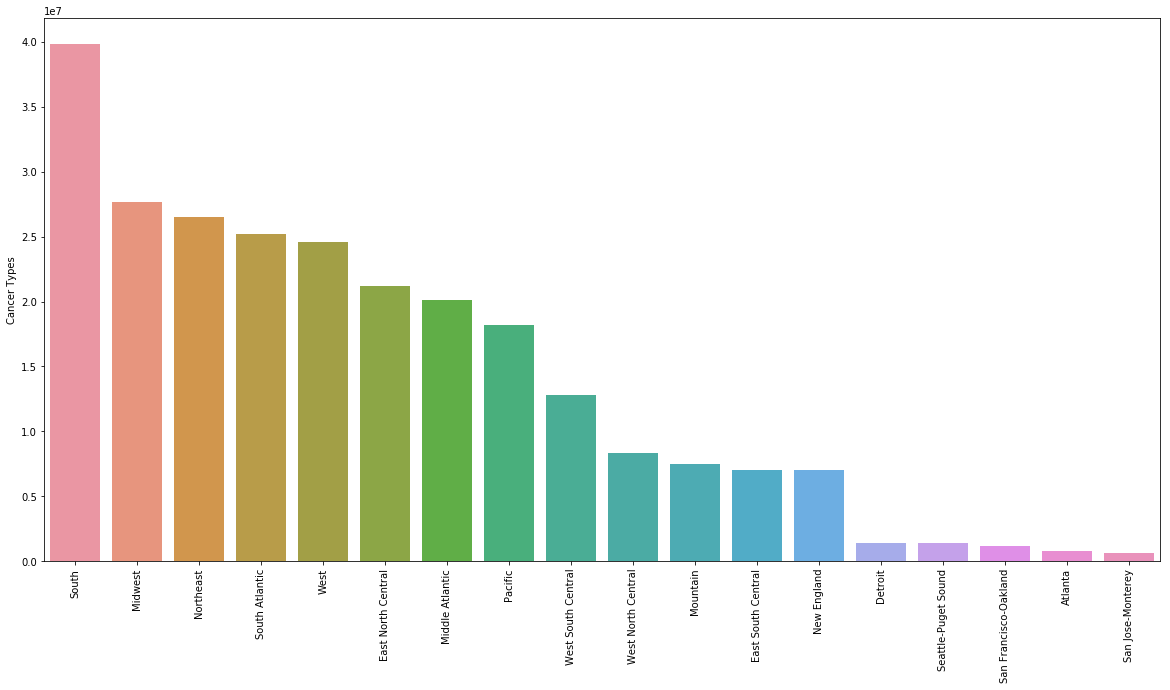

In [78]:
area1={}
states=set(dt.AREA)
da=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["AREA","COUNT"]]
for state in states:
    if state not in r1:
        continue
    dat1=da.loc[da.AREA==state,"COUNT"]
    cnt=pd.to_numeric(dat1,errors='coerce').sum()
    area1[state]=cnt    
del area1['United States (comparable to ICD-O-2)']    
ranked=sorted(area1.items(),key=itemgetter(1),reverse=True)
ctyAr=[ranked[i][0] for i in range(len(ranked))]
ctAr=[ranked[i][1] for i in range(len(ranked))]
plt.figure(figsize=(20,10))
#plt.bar(ctyAr,ctAr) 
ax=sns.barplot(ctyAr,ctAr)
ax.set_xticklabels(ctyAr, rotation=90)
ax.set_ylabel('Counts')
ax.set_ylabel('Cancer Types')

# CUMULATIVE CANCER COUNT GROUPED BY STATE
 
We obtained each state's data and identified the types of cancer in that state, we obtained the frequency of cancer and summed them up. The counts are displayed with an HTML table. 

In [69]:
out="""
<table>
    <tr>
       <th>State</th>
       <th> Cancer Site</th>
       <th> Cumulative Count</th>
     </tr>    
"""
da=dt.loc[(dt.SITE!="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["SITE","AREA","COUNT"]]
for state in states:
    if state in r1:
        continue
    stdat=da.loc[da.AREA==state,["SITE","COUNT"]]
    for cancer in ctype:
        stct=stdat.loc[stdat.SITE==cancer,"COUNT"]
        cnt=pd.to_numeric(stct,errors='coerce').sum()
        out+="<tr>"
        out+="<td>"+state+"</td>"
        out+="<td>"+cancer+"</td>"
        out+="<td>"+str(cnt)+"</td>"
        out+="</tr>"
out+="</table>" 
display(HTML(out))

State,Cancer Site,Cumulative Count
Oklahoma,"Female Breast, in situ",30296.0
Oklahoma,"Corpus and Uterus, NOS",32834.0
Oklahoma,Female Breast,200090.0
Oklahoma,Stomach,19866.0
Oklahoma,Kaposi Sarcoma,0.0
Oklahoma,Thyroid,19879.0
Oklahoma,Cervix,14202.0
Oklahoma,Mesothelioma,1627.0
Oklahoma,Kidney and Renal Pelvis,52606.0
Oklahoma,Pancreas,53082.0


# CANCER TREND
### IS CANCER REDUCING PER YEAR?
We needed all the cancer occurences associated with a particular year. The count is plotted againt the year in a time series plot as shown below. We observed that cancer might be increasing per year.

Text(0.5,0.98,'Cancer Trend Per Year')

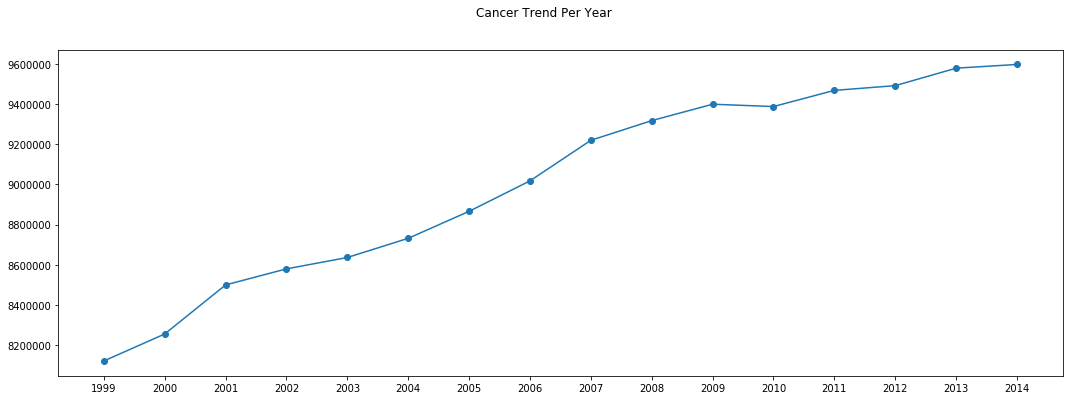

In [55]:
####
#### Trend question: Is cancer reducing with year?
#### For all cancer type find the count for each year
#### plot the year against its cancer count
#### How
#### uniqyear
#### loc site=="All cancer site", get year, count columns
ctdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["YEAR","COUNT"]]
years=set(yda.YEAR)
for year in years:
    ctda=yda.loc[yda.YEAR==year,"COUNT"]
    y_cnt=pd.to_numeric(ctda,errors='coerce').sum()
    ctdic[year]=y_cnt
srs=pd.Series(ctdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Cancer Trend Per Year')


# But if Cancer is increasing is the death associated with cancer also Increasing?

### Mortality trend (All)

FOr each year we filtered all the count of cancers that have cauesd mortality, the sum of these counts gives the associated mortality for that particular year.

Text(0.5,0.98,'Cancer Mortality Trend In USA')

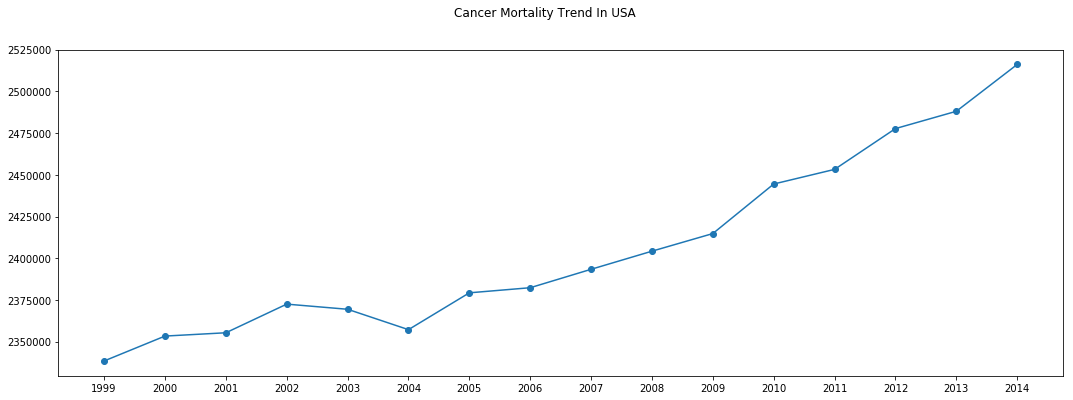

In [54]:
#### Mortality Trend in the whole USA
ctdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["YEAR","COUNT","EVENT_TYPE"]]
years=set(yda.YEAR)
for year in years:
    ctda=yda.loc[(yda.YEAR==year)&(yda.EVENT_TYPE=="Mortality"),"COUNT"]
    y_cnt=pd.to_numeric(ctda,errors='coerce').sum()
    ctdic[year]=y_cnt
srs=pd.Series(ctdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Cancer Mortality Trend In USA')
    

# Are new cancer (Incidence) also increasing with time?
We streamlined our filtering to obtain cancer incidence for all cancer site summing them for each year.
We observed that incidence trend has not been significantly increasing.

Text(0.5,0.98,'Cancer Incidence Per Year In USA')

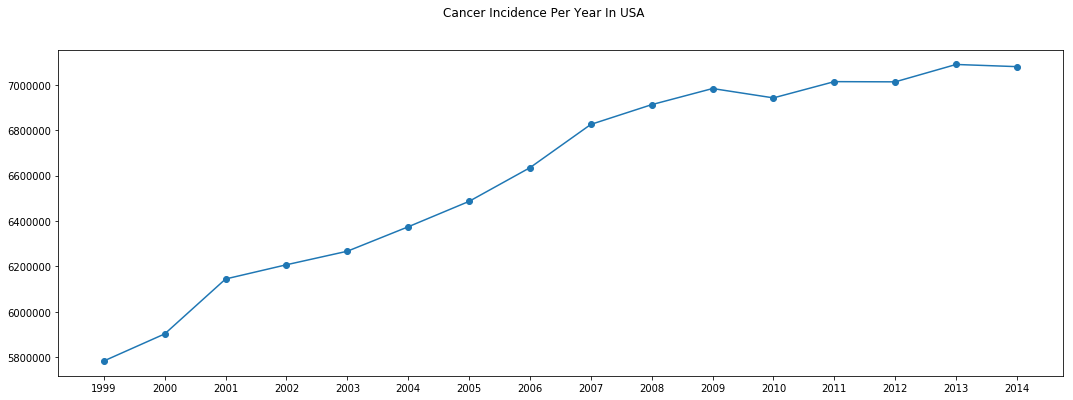

In [50]:
#### Incidence Trend in the whole USA
ctdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["YEAR","COUNT","EVENT_TYPE"]]
years=set(yda.YEAR)
for year in years:
    ctda=yda.loc[(yda.YEAR==year)&(yda.EVENT_TYPE=="Incidence"),"COUNT"]
    y_cnt=pd.to_numeric(ctda,errors='coerce').sum()
    ctdic[year]=y_cnt
ctdic  
srs=pd.Series(ctdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Cancer Incidence Per Year In USA')


# As years go by, are we losing more men to Cancer?
#### We obtained the EVENT_TYPE rows that are mortality for male SEX for each year and summed them up. Then plotted. 

Text(0.5,0.98,'Mortality trend in Male')

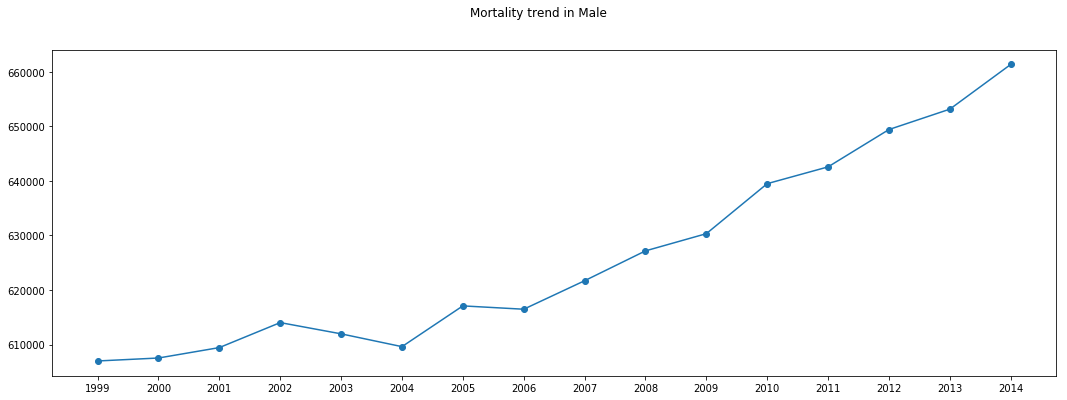

In [51]:
#### Mortality trend in Male
mdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["SEX","YEAR","COUNT","EVENT_TYPE"]]
dataf=yda.loc[(yda.SEX=="Male")&(yda.EVENT_TYPE=="Mortality"),["YEAR","COUNT"]]
for year in years:
    mtda=dataf.loc[dataf.YEAR==year,"COUNT"]
    mcnt=pd.to_numeric( mtda,errors='coerce').sum()
    mdic[year]=mcnt
srs=pd.Series(mdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Mortality trend in Male')


# What about our Women, are they also dying of cancer?
#### We obtained the EVENT_TYPE rows that are mortality for female SEX for each year and summed them up. Then plotted. 

Text(0.5,0.98,'Mortality trend in female')

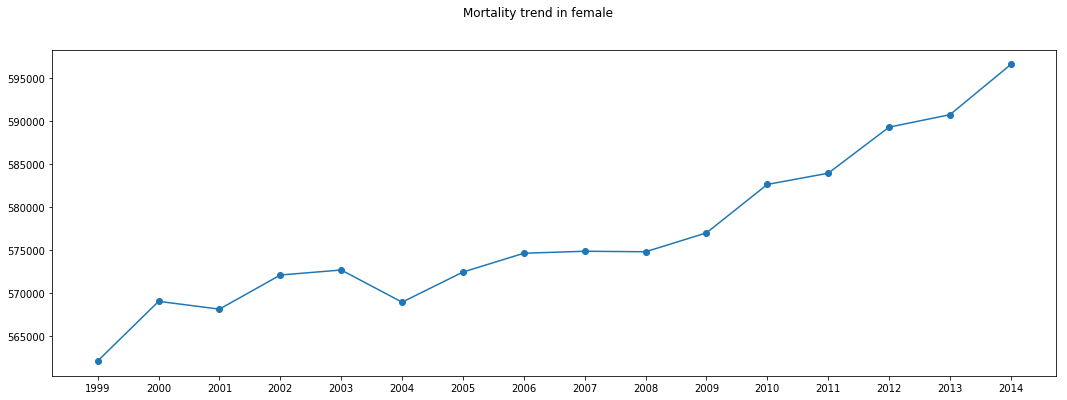

In [114]:
#### Mortality trend in female
mdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["SEX","YEAR","COUNT","EVENT_TYPE"]]
dataf=yda.loc[(yda.SEX=="Female")&(yda.EVENT_TYPE=="Mortality"),["YEAR","COUNT"]]
for year in years:
    mtda=dataf.loc[dataf.YEAR==year,"COUNT"]
    mcnt=pd.to_numeric( mtda,errors='coerce').sum()
    mdic[year]=mcnt
mdic
srs=pd.Series(mdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Mortality trend in female')


# New Cancer  incidence in Male, What is the trend? Increasing or decreasing?

We went through all cancer sites and obtained the incidence count for males for each unique year.

There is a downward trend which is goodnews.

Text(0.5,0.98,'Incidence trend in Male')

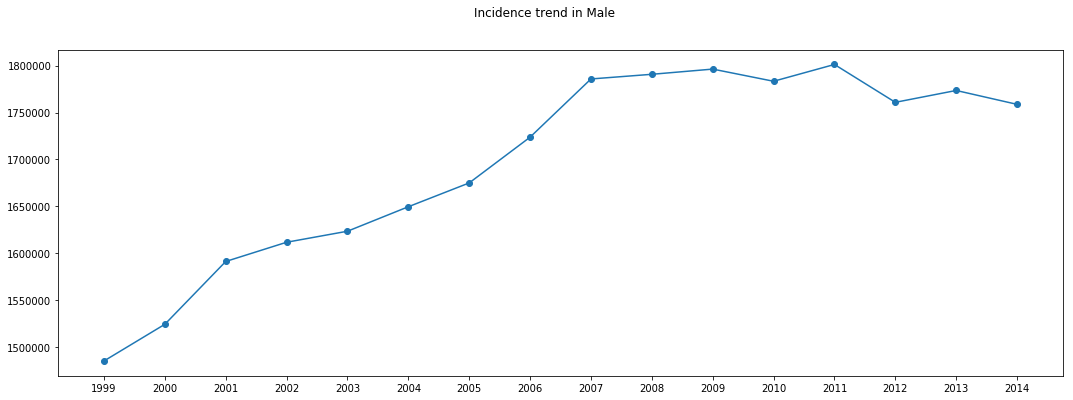

In [60]:
#### Incidence trend in Male
mdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["SEX","YEAR","COUNT","EVENT_TYPE"]]
dataf=yda.loc[(yda.SEX=="Male")&(yda.EVENT_TYPE=="Incidence"),["YEAR","COUNT"]]
for year in years:
    mtda=dataf.loc[dataf.YEAR==year,"COUNT"]
    mcnt=pd.to_numeric( mtda,errors='coerce').sum()
    mdic[year]=mcnt
srs=pd.Series(mdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Incidence trend in Male')


# New Cancer incidence in female What is the trend? Increasing or decreasing?

We went through all cancer sites and obtained the incidence count for females for each unique year.

There is an upard trend in new cancers in female


Text(0.5,0.98,'Incidence trend in Female')

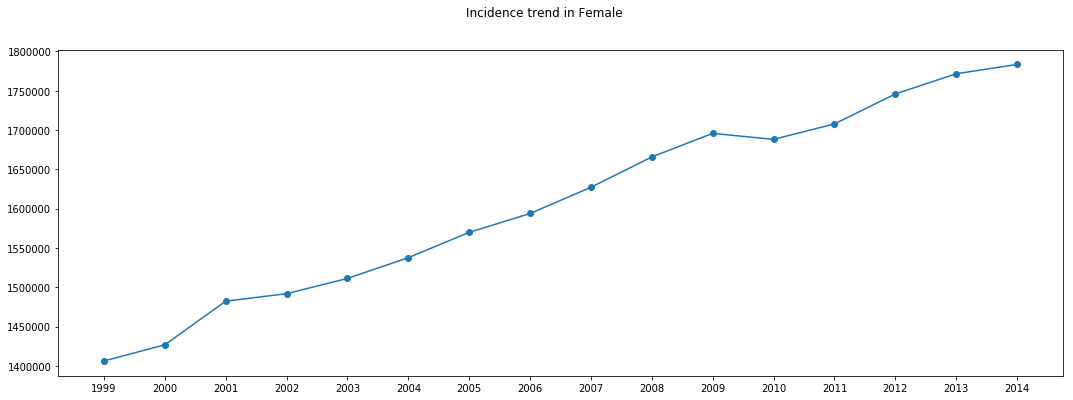

In [61]:
### Incidence trend in female
mdic={}
yda=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR!='2010-2014'),["SEX","YEAR","COUNT","EVENT_TYPE"]]
dataf=yda.loc[(yda.SEX=="Female")&(yda.EVENT_TYPE=="Incidence"),["YEAR","COUNT"]]
for year in years:
    mtda=dataf.loc[dataf.YEAR==year,"COUNT"]
    mcnt=pd.to_numeric( mtda,errors='coerce').sum()
    mdic[year]=mcnt
srs=pd.Series(mdic)
s=srs.sort_index()
year=[i for i in s.index] 
count=[i for i in s.values]
f=plt.figure(figsize=(18,6))
plt.plot(year,count, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Incidence trend in Female')


# MODEL BUILDING
## Hey! we don't really know much statistics, we only tried
We are trying to build a predictive model that could classify mortality or incidence of cancer based on predictures like cancer count, population and cancer rate. Because mortality and incidence are binomial in nature we assume logistic regression will be a suitable model. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

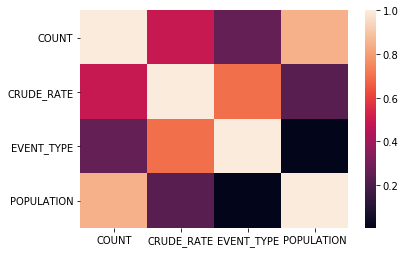

In [55]:
### MODEL BUILDING
countsm={}
da=dt.loc[(dt.SITE=="All Cancer Sites Combined")&(~dt.AREA.isin(r1))&(dt.YEAR=='2010-2014')&(dt.SEX=="Male and Female"),["EVENT_TYPE","COUNT","POPULATION","CRUDE_RATE"]]
#for cancer in ctype:
#    mct_cancer=da.loc[da.SITE==cancer,["SITE","COUNT","RATE","POPULATION"]]
#    print(mct_cancer)
#da
### Now I Use the model to predict Total Incidence and Mortality in USA Asssociated with cancer
### The Aim of the model is, Given a populatin and CRUDE_RATE can I predict the associated proportion of incidence and mortality
#da = da.dropna()
#print(da.shape)
data_columns=list(da.columns)
#sns.countplot(x='EVENT_TYPE',data=da, palette='hls')
#plt.show()
#sns.heatmap(da.corr())
#plt.show()
#da.corr()
count=pd.to_numeric(da.COUNT,errors='coerce')
pop=pd.to_numeric(da.POPULATION,errors='coerce')
c_rate=pd.to_numeric(da.CRUDE_RATE,errors='coerce')
event=da.EVENT_TYPE.apply(lambda x: 0 if x=="Mortality" else 1)
logit=pd.DataFrame({"EVENT_TYPE":event,"POPULATION":pop,"COUNT":count,"CRUDE_RATE":c_rate}).dropna()
sns.heatmap(logit.corr())
y=logit.EVENT_TYPE
x=logit[["COUNT","CRUDE_RATE","POPULATION"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
X_train
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)




In [56]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


In [221]:
score=classifier.score(X_test, y_test)
score

0.8867924528301887

Text(0.5,1,'Accuracy Score: 0.8867924528301887')

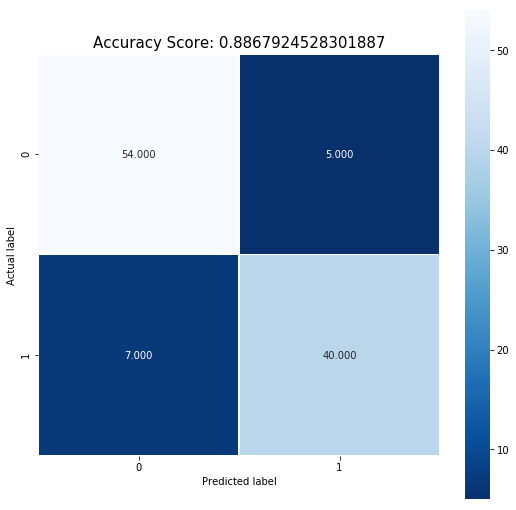

In [223]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [202]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.92      0.90        59
          1       0.89      0.85      0.87        47

avg / total       0.89      0.89      0.89       106



## Our Model has a predictive ability of 89%